# PROTOTYPE
### Pulling financial data based on a ticker defined by user

#### First run the imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

#### Run this cell too please :D

This defines the function that pulls financial data. You may need to create a folder called "Income" in your directory

In [2]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [3]:
stock_list = pd.read_csv('list_of_stocks.csv')

In [4]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
def ticker_input():
    ticker = input('Please enter a ticker:').upper()
    ticker_df = income_puller(ticker.upper())
    return ticker_df, ticker

#### Please run this cell and enter a ticker; let's see if it works!

Please enter a ticker: LMT


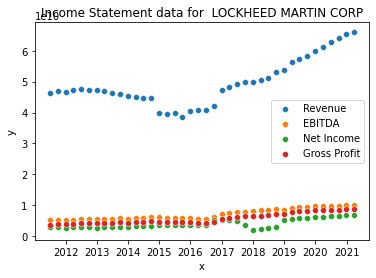

In [5]:
# call the function and print charts
ticker_df,ticker = ticker_input()
ticker.upper()

# plot the charts I like most
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Revenue')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='EBITDA')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Net Income Common')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Income Statement data for {ticker_name[5:]}');
